# Stats 131 Final Project
### Group: The S.S. Minnow Johnson


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Context and description of the data


In [2]:
#games = pd.read_csv(r'C:\Users\Patrick Tawil\Desktop\Stats131\Stats131Project\Datasets\Video_Games_Sales.csv')
games = pd.read_csv('Video_Games_Sales.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
games.shape

(16719, 16)

Background information on the subject and field of study

Information about data collection.

a. Who collected the data
Sales from VGChartz and critic/user scores from Metacritic

b. When the data was collected

c. How the data was collected

d. Any implications this may have on analysis

# 2. Exploratory Data Analysis

Data cleaning

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
#2 game names that are null
games[games.Name.isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#went to VGChartz to find actual name
games.loc[659,"Name"] = 'Mortal Kombat'
games.loc[14246,"Name"] = 'Mortal Kombat II'

In [8]:
games.loc[[659,14246]]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,Mortal Kombat,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,Mortal Kombat II,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [10]:
#change game that has release year 2020 to 2009
games[games["Year_of_Release"] == 2020]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E


In [11]:
games.loc[5936,"Year_of_Release"] = 2009
games.loc[5936,:]

Name               Imagine: Makeup Artist
Platform                               DS
Year_of_Release                      2009
Genre                          Simulation
Publisher                         Ubisoft
NA_Sales                             0.27
EU_Sales                                0
JP_Sales                                0
Other_Sales                          0.02
Global_Sales                         0.29
Critic_Score                          NaN
Critic_Count                          NaN
User_Score                            tbd
User_Count                            NaN
Developer                         Ubisoft
Rating                                  E
Name: 5936, dtype: object

In [12]:
#change user score that has tbd to NaN
games.User_Score[games.User_Score == 'tbd'].count()

2425

In [13]:
games.User_Score = games.User_Score.replace('tbd', np.nan)

In [14]:
games.User_Score[games.User_Score == 'tbd'].count()

0

In [15]:
#change type from string to float
games.User_Score = games.User_Score.astype(float)

Exploratory Analysis

### Which Developers make the most games?

                 Developer
Ubisoft                204
EA Sports              172
EA Canada              167
Konami                 162
Capcom                 139
EA Tiburon             108
Electronic Arts        104
Others                9040


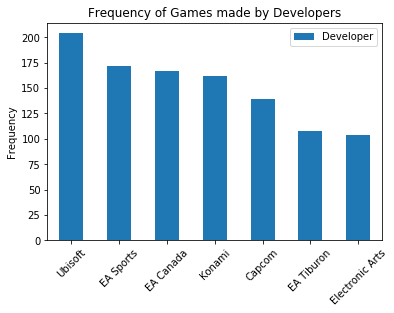

In [16]:
"""This will get the top N most frequent results from the column specified. If True, the Others parameter will also add a Others category
to merge up all the smaller values together."""

def get_top_n_frequency(df, n, col_name, others = True):
    df_count = df[col_name].value_counts()
    topN = pd.DataFrame(df_count[:n])
    if not others:
        return topN
    others = pd.Series({"Others" : df_count[n:].sum()}, name = col_name)
    others_df = pd.DataFrame(others)
    return topN.append(others_df)


top_devs_with_others = get_top_n_frequency(games, 7, "Developer", others=True)
print(top_devs_with_others)
top_devs_without_others = get_top_n_frequency(games, 7, "Developer", others=False)

top_devs_without_others.plot(kind = "bar")
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
plt.title("Frequency of Games made by Developers")
plt.show()

### Who are the biggest Publishers?

                              Publisher
Electronic Arts                    1356
Activision                          985
Namco Bandai Games                  939
Ubisoft                             933
Konami Digital Entertainment        834
THQ                                 715
Nintendo                            706
Others                            10197


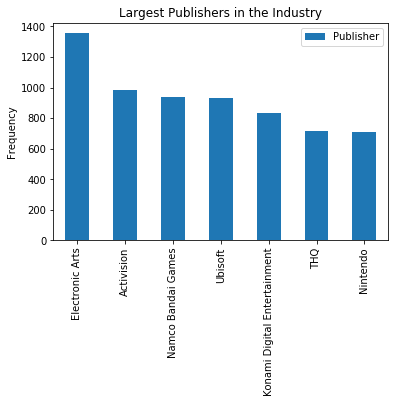

In [17]:
top_pubs_with_others = get_top_n_frequency(games, 7, "Publisher", others=True)
print(top_pubs_with_others)
top_pubs_without_others = get_top_n_frequency(games, 7, "Publisher", others=False)

top_pubs_without_others.plot(kind = "bar")
plt.ylabel("Frequency")
plt.title("Largest Publishers in the Industry")
plt.show()

### Which Platform has the most games?

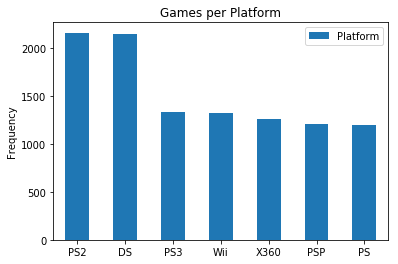

In [18]:
get_top_n_frequency(games, 7, "Platform", others=False).plot(kind="bar")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.title("Games per Platform")
plt.show()

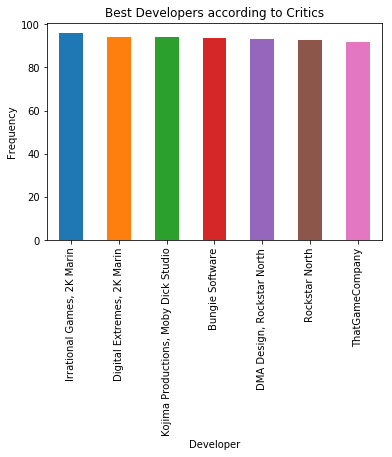

In [19]:
#Maybe look into how many games those devs actually made, maybe 1 hit wonders are something to ignore, we'd have to
#agree on a value to pick

#If the only given value is NaN then we'll get NaN otherwise it's skipped
mean_scores_by_dev = games.groupby("Developer")["Critic_Score"].mean()
best_devs = mean_scores_by_dev.sort_values(ascending=False).head(7)
best_devs.plot(kind = "bar")
plt.ylabel("Frequency")
plt.title("Best Developers according to Critics")
plt.show()

In [20]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#log transform global sales to make more normal

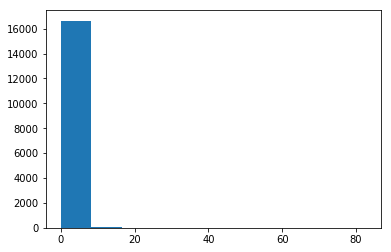

In [22]:
plt.hist(games.Global_Sales)
plt.show()

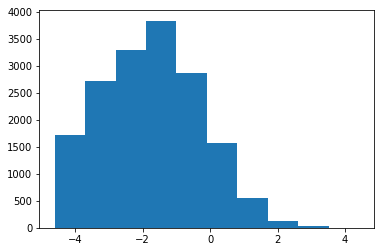

In [23]:
plt.hist(np.log(games.Global_Sales))
plt.show()

# 3. Data modeling